# Helicopter Prison Escapes

![](prison_escape.jpg)

## Acquire the data

In this project we'll be working with the table provided in https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes that present a list of helicopter prison escapes across the world.

In [1]:
import pandas as pd

url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"

df = pd.read_html(url)

In [2]:
df_copy = df[1:].copy()

In [3]:
type(df_copy)

list

In [4]:
len(df_copy)

7

In [5]:
df_copy[0].head()

,Date,Prison name,Country,Succeeded,Escapee(s),Details
0,"August 19, 1971",Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro,Joel David Kaplan was a New York businessman w...
1,"October 31, 1973",Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon,"On October 31, 1973 an IRA member hijacked a h..."
2,"May 24, 1978","United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...,43-year-old Barbara Ann Oswald hijacked a Sain...
3,"February 27, 1981","Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont,"With the help of Serge Coutel, Gérard Dupré an..."
4,"May 7, 1981","Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...,Marina Paquet held a sawed off shotgun against...


In [6]:
prison_scape_data = df_copy[0]

In [7]:
prison_scape_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         48 non-null     object
 1   Prison name  48 non-null     object
 2   Country      48 non-null     object
 3   Succeeded    48 non-null     object
 4   Escapee(s)   48 non-null     object
 5   Details      48 non-null     object
dtypes: object(6)
memory usage: 2.4+ KB


In [8]:
prison_scape_data.shape

(48, 6)

In the data colected we have 48 helicopter prison scapes attempt.

In [9]:
prison_scape_data["Date"] = (prison_scape_data["Date"].str[-4:]).astype(int)

## Let's find the number of different countries recorded in the dataframe 

In [10]:
number_of_countries = prison_scape_data.Country.nunique()
print(f"There are {number_of_countries} different countries in the data colected")

There are 15 different countries in the data colected


In [11]:
succesfull_scapes = prison_scape_data[prison_scape_data['Succeeded']=="Yes"].Country.value_counts()
succesfull_scapes[:3]

France           11
United States     6
Canada            3
Name: Country, dtype: int64

The country with most succesfull helicopter scapes is **France** with 11.

In [12]:
intents = prison_scape_data.Country.value_counts()
intents[:3]

France           15
United States     8
Canada            4
Name: Country, dtype: int64

The country with most attempts of helicopter scapes is **France** with 15.

In [13]:
prison_scape_data["Date"][prison_scape_data["Succeeded"]=="Yes"].value_counts()[:3]

1986    3
2009    3
2001    2
Name: Date, dtype: int64

The years with the bigger number of success was **1986**, **2009** and **2001** with 2 success in the 2001 and 3 in the other years.

In [14]:
import matplotlib.pyplot as plt

failed_scapes = prison_scape_data[prison_scape_data['Succeeded']=="No"].Country.value_counts()

In [15]:
failed_scapes

France            4
United States     2
Belgium           2
Greece            2
Canada            1
Australia         1
Netherlands       1
United Kingdom    1
Name: Country, dtype: int64

In [16]:
del prison_scape_data["Details"]

In [17]:
prison_scape_data.head()

,Date,Prison name,Country,Succeeded,Escapee(s)
0,1971,Santa Martha Acatitla,Mexico,Yes,Joel David Kaplan Carlos Antonio Contreras Castro
1,1973,Mountjoy Jail,Ireland,Yes,JB O'Hagan Seamus TwomeyKevin Mallon
2,1978,"United States Penitentiary, Marion",United States,No,Garrett Brock TrapnellMartin Joseph McNallyJam...
3,1981,"Fleury-Mérogis, Essonne, Ile de France",France,Yes,Gérard DupréDaniel Beaumont
4,1981,"Orsainville Prison, Quebec City",Canada,No,Marina Paquet (hijacker)Giles Arseneault (pris...


In [18]:
relation_succeed_fail = {country : [len(prison_scape_data[(prison_scape_data["Country"]==country)&
                                                          (prison_scape_data["Succeeded"]=="Yes")]),
                                    len(prison_scape_data[(prison_scape_data["Country"]==country)&
                                                          (prison_scape_data["Succeeded"]=="No")])]
                         for country in prison_scape_data.Country.unique()}

In [19]:
relation_succeed_fail

{'Mexico': [1, 0],
 'Ireland': [1, 0],
 'United States': [6, 2],
 'France': [11, 4],
 'Canada': [3, 1],
 'Australia': [1, 1],
 'Brazil': [2, 0],
 'Italy': [1, 0],
 'United Kingdom': [1, 1],
 'Puerto Rico': [1, 0],
 'Chile': [1, 0],
 'Netherlands': [0, 1],
 'Greece': [2, 2],
 'Belgium': [2, 2],
 'Russia': [1, 0]}

## Let's build a bar plot to represent the data  

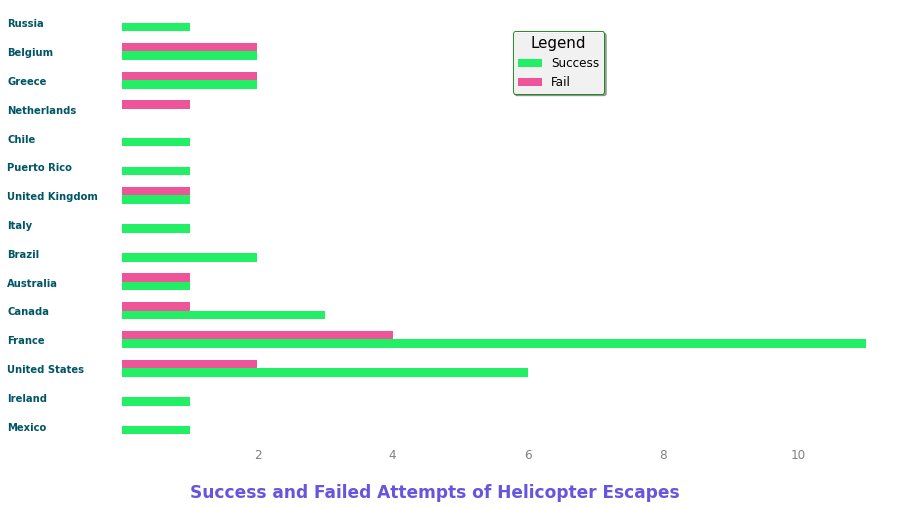

In [20]:
countries = [x for x in relation_succeed_fail.keys()]
success = [x[0] for x in relation_succeed_fail.values()]
fail = [x[1] for x in relation_succeed_fail.values()]
new_all_l = { "Country":countries,
             "Success":success,
             "Fail":fail }

colors = ["#22ee66","#ee5599"]
new_all_df = pd.DataFrame(new_all_l, index=new_all_l["Country"])

ax = new_all_df.plot(kind='barh',figsize=(14,8),color = colors,width = 0.6,rot=0);
for location in ["left","right","bottom","top"]:
    ax.spines[location].set_visible(False)
ax.tick_params(left=False,bottom=False)
ax.tick_params(axis='x',colors='grey',labelsize = 12)
ax.text(x=1,y=-2.5,s='Success and Failed Attempts of Helicopter Escapes',weight='bold',size=17,color="#6655dd");
ax.set_yticks([])
for i,models in zip(range(16),new_all_df["Country"]):
    ax.text(x=-1.7,y=i-0.15,s=models,fontweight="bold",color="#005566",alpha=1)
ax.set_xticks([2,4,6,8,10]);
plt.legend(title="Legend",loc=(0.5,0.8),labelspacing=0.5,framealpha=0.85,fontsize=12,title_fontsize=15,shadow=True,edgecolor="green")
ax.set_facecolor('#FFFFFF')
ax.patch.set_facecolor('w')
plt.show()

There is too much information in the previus graph. Let's fix that

In [21]:
other_country = prison_scape_data[~prison_scape_data["Country"].isin(['United States',"France","Canada"])]

In [22]:
other_country["Succeeded"].value_counts()

Yes    14
No      7
Name: Succeeded, dtype: int64

In [23]:
new_inf = {}
for k, v in relation_succeed_fail.items():
    if k in ['United States',"France","Canada"]: 
        new_inf[k] = {"Success":v[0],
                      "Fail":v[1]}
new_inf["Others"] = {"Success":len(other_country[other_country["Succeeded"] == "Yes"]),
                     "Fail":len(other_country[other_country["Succeeded"] == "No"])}

In [24]:
new_inf

{'United States': {'Success': 6, 'Fail': 2},
 'France': {'Success': 11, 'Fail': 4},
 'Canada': {'Success': 3, 'Fail': 1},
 'Others': {'Success': 14, 'Fail': 7}}

In [25]:
new_df = pd.DataFrame(new_inf)

In [26]:
new_df

,United States,France,Canada,Others
Success,6,11,3,14
Fail,2,4,1,7


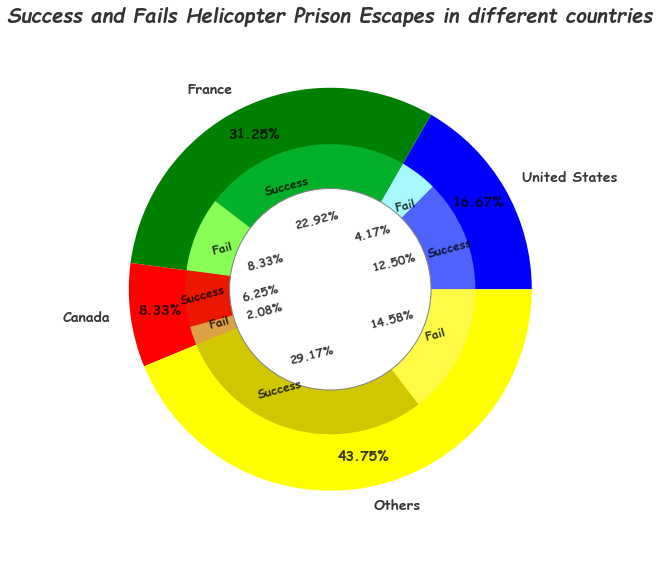

In [27]:
plt.figure(figsize = (8,8))
labels = new_df.columns
sizes = [new_df["United States"].sum(),new_df["France"].sum(),new_df["Canada"].sum(),new_df["Others"].sum()]
colors = ["blue","green","red","yellow"]
explode = (0,0,0,0)

labels_subgroup = ["Success","Fail"]*4
sizes_subgroup = [new_df["United States"][0],new_df["United States"][1],
                 new_df["France"][0],new_df["France"][1],
                 new_df["Canada"][0],new_df["Canada"][1],
                 new_df["Others"][0],new_df["Others"][1]]
colors_sub = ["#4d63fb","#a6f9fd","#02b02a","#89fe57","#ec1700","#dda045","#d1c701","#fefa45"]
outside = plt.pie(sizes,explode = explode, labels = labels, colors = colors, autopct = '%.2f%%', pctdistance = 0.85,textprops = {
                      "fontsize" : 14,
                     "fontweight":"bold",
                     'fontfamily':"cursive",
                        "alpha":0.78})

inside = plt.pie(sizes_subgroup,radius = 0.72, labels = labels_subgroup, 
                 labeldistance = 0.72, autopct = '%.2f%%', pctdistance = 0.48, colors = colors_sub,textprops = {
                     "fontsize" : 12,
                     "fontweight":"bold",
                     'fontfamily':"cursive",
                     'rotation' : '15',
                        "alpha":0.78})

plt.title("Success and Fails Helicopter Prison Escapes in different countries",
          fontsize = 20,fontstyle="oblique",fontweight="bold",
          fontfamily="cursive",color="black",horizontalalignment="center",alpha=0.8)

centre_circle =plt.Circle((0,0),0.5,color = "grey", fc = "white", lw = 1)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()